In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['axes.labelpad'] = 15
matplotlib.rcParams['axes.titlepad'] = 20
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams['legend.fontsize'] = 'x-large'

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.font_manager as fm
path_noto = Path('../fonts/NotoSansCJKkr-Regular.otf')

noto_path = '../fonts/NotoSansCJKkr-Regular.otf'
noto_name = fm.FontProperties(fname=noto_path).get_name()

sns.set(style='ticks', palette='Set2')
sns.despine()
# plt.style.use('ggplot')
# plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams.update({
    'axes.facecolor': '#f5f5f5',
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.grid': True
})
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
colors = sns.color_palette('pastel')[0:7]

titlef = 20
labelf = 16
ticksf = 14


<Figure size 600x400 with 0 Axes>

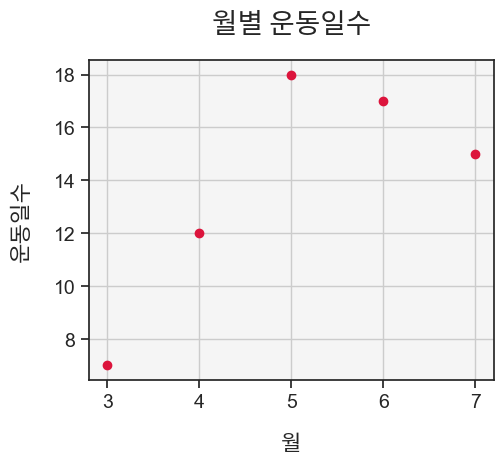

In [2]:
dummy = pd.DataFrame({
    '월': [3, 4, 5, 6, 7],
    '운동횟수': [7, 12, 18, 17, 15]
})

filepath = Path('./dummy.csv')
dummy.to_csv(filepath, index=False, encoding='utf-8-sig')

plt.title('월별 운동일수', font=path_noto, fontsize=20)
plt.xlabel('월', font=path_noto, fontsize=16)
plt.ylabel('운동일수', font=path_noto, fontsize=16)
plt.scatter(dummy['월'], dummy['운동횟수'], c='crimson')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# plt.yticks(range(0, 20, 2))
# plt.xticks(range(3, 8, 1))
plt.grid(True)
plt.show()

([<matplotlib.axis.XTick at 0x2cb36b914b0>,
 [Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

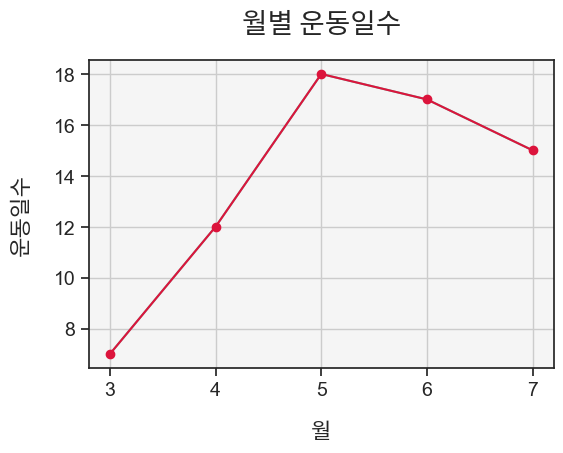

In [3]:
sns.lineplot(data=dummy, x='월', y='운동횟수', marker='o')
plt.plot(dummy['월'], dummy['운동횟수'], marker='o', c='crimson')
plt.title('월별 운동일수', font=path_noto, fontsize=20)
plt.xlabel('월', font=path_noto, fontsize=16)
plt.ylabel('운동일수', font=path_noto, fontsize=16)
plt.xticks(range(3, 8))

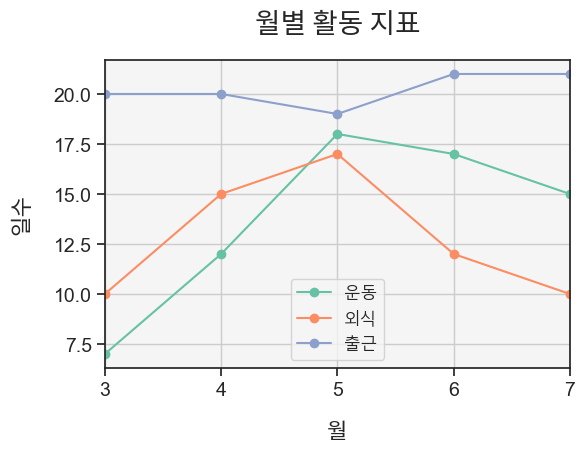

In [4]:
dummy['외식일수'] = [10, 15, 17, 12, 10]
dummy['출근일수'] = [20, 20, 19, 21, 21]

plt.plot(dummy['월'], dummy['운동횟수'], label='운동', marker='o')
plt.plot(dummy['월'], dummy['외식일수'], label='외식', marker='o')
plt.plot(dummy['월'], dummy['출근일수'], label='출근', marker='o')
plt.title("월별 활동 지표", font=path_noto, fontsize=20)
plt.xlabel("월", font=path_noto, fontsize=16)
plt.ylabel('일수', font=path_noto, fontsize=16)
plt.xlim([3.0, 7.0])
plt.xticks(np.arange(min(dummy['월']), max(dummy['월'])+1, 1.0))
plt.legend(prop={'family':'Malgun Gothic', 'size':12})

In [ ]:
dum1 = pd.DataFrame({
    '연도': [2000, 2010, 2020],
    '당일': [7, 13, 7],
    '숙박': [5, 2, 1]
})


fig = plt.figure(figsize=(6, 4))
plt.plot(dum1['연도'], dum1['당일'], linewidth=3, marker='o')
plt.plot(dum1['연도'], dum1['숙박'], linewidth=3, marker='o')
plt.xlabel('연도', font=path_noto, fontsize=20)
plt.xticks(np.arange(min(dum1['연도']), max(dum1['연도'])+1, 10), fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
dum2 = pd.DataFrame({
    '월': [1, 2, 3],
    '대여': [76, 88, 68],
    '반납': [52, 77, 71]
})

fig = plt.figure(figsize=(6, 4))
plt.plot(dum2['월'], dum2['대여'], linewidth=3, marker='o')
plt.plot(dum2['월'], dum2['반납'], linewidth=3, marker='o')
plt.xticks(np.arange(min(dum2['월']), max(dum2['월'])+1, 1), fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("월", font=path_noto, fontsize=20)

In [ ]:
dum3 = pd.DataFrame({
    '날짜': ['호러', '로맨스', 'SF'],
    '섭취': [70, 120, 180],
    '소모': [40, 50, 110]
})

fig = plt.figure(figsize=(6, 4))
plt.plot(dum3['날짜'], dum3['섭취'], linewidth=3, marker='o')
plt.plot(dum3['날짜'], dum3['소모'], linewidth=3, marker='o')
plt.xticks(font=path_noto, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("장르", font=path_noto, fontsize=20)

In [ ]:
dum4 = pd.DataFrame({
    '연도': [2019, 2020, 2021],
    '추가': [1500, 1350, 1100],
    '삭제': [300, 600, 550]
})

dum5 = pd.DataFrame({
    '장르': ['호러', '로맨스', 'SF'],
    '추가': [70, 120, 180],
    '삭제': [40, 50, 110]
})

fig = plt.figure(figsize=(6, 4))
plt.plot(dum4['연도'], dum4['추가'], label='추가', lw=3)
plt.plot(dum4['연도'], dum4['삭제'], label='삭제', lw=3)
# tidy = dum5.melt(id_vars='장르').rename(columns=str.title)
# ax = sns.barplot(data=tidy, x='장르', y='Value', hue='Variable', palette=colors)
# ax.set(xlabel=None, ylabel=None)
plt.xticks(font=path_noto, fontsize=16)
plt.yticks(fontsize=16)
plt.title("연도별 콘텐츠 추가/삭제건수", font=path_noto, fontsize=20)
# plt.xlabel("장르", font=path_noto, fontsize=16)
# plt.ylabel("추가/삭제건수", font=path_noto, fontsize=16)
plt.xticks(range(2019, 2022))

plt.legend(prop={'family':'Malgun Gothic'})

In [ ]:
covid = pd.read_csv('./covid19.csv')
covid_kr = covid[covid['location'] == 'South Korea'][['date', 'new_cases']].reset_index().drop(columns=['index'])
covid_kr['date'] = pd.to_datetime(covid_kr['date'])

fig, ax = plt.subplots()

# sns.set_style('darkgrid')
ax.plot(covid_kr['date'].iloc[900:], covid_kr['new_cases'].iloc[900:])
plt.title("날짜별 코로나-19 신규확진자수", font=path_noto, fontsize=titlef)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
covid_exp = covid_kr.iloc[900:]
covid_exp.columns = ['날짜', '신규확진자수']
filepath = Path('./covid_kr.csv')
# covid_exp.to_csv(filepath, index=False, encoding='utf-8-sig')
covid_exp

In [ ]:
line1 = pd.DataFrame({
    '물품':['햄버거', '커피'],
    2000:[2000, 1000],
    2010:[3000, 2000],
    2020:[4500, 4000]
})

line2 = pd.DataFrame({
    '미국':[15000],
    '한국':[3600],
    '중국':[55000],
    '독일':[6500]
})

line3 = pd.DataFrame({
    '항목': ['생활비', '주거비'],
    '지출': [200000, 700000]
})

line4 = pd.DataFrame({
    '도시': ['서울', '대구'],
    '1월': [-1, -3],
    '2월': [3, 2],
    '3월': [8, 5]
})

line1_tidy = line1.melt(id_vars='물품', var_name='연도', value_name='가격')
# line1_tidy
ax1 = sns.lineplot(data=line1_tidy, x='연도', y='가격', hue='물품', ci=None, lw=3)
ax1.set(xlabel=None, ylabel=None)
plt.legend(prop=path_noto)

In [ ]:
sns.barplot(data=line2, orient='h')
plt.yticks(font=path_noto)

In [ ]:
ax = sns.barplot(data=line3, x='항목', y='지출')
ax.set(xlabel=None, ylabel=None)
plt.xticks(font=path_noto)

In [ ]:
line4_tidy = line4.melt(id_vars='도시', var_name='연도', value_name='기온')
ax = sns.lineplot(data=line4_tidy, x='연도', y='기온', hue='도시', lw=3)
ax.set(xlabel=None, ylabel=None)
plt.xticks(font=path_noto)
plt.legend(prop=path_noto)

In [ ]:
air = pd.read_csv("./AirPassengers.csv", index_col=0, parse_dates=True)
air.columns = ['승객 수']
air.index.names = ['연월']

fig, ax = plt.subplots()
air.plot(ax=ax, lw=3)
plt.legend(prop=path_noto)
plt.xlabel("연도", font=path_noto, fontsize=labelf)

In [ ]:
res = seasonal_decompose(air['승객 수'], period=12)

res_df = pd.DataFrame({
    'trend': res.trend,
    'seasonal': res.seasonal,
    'resid': res.resid,
    'observed': res.observed
})

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10))

# ax[0].plot(res_df.index, res_df['observed'], lw=3)
# # ax[0].set_title("관측값")
# # ax[0].set_xlabel("연도", font=path_noto, fontsize=14)
# ax[0].set_ylabel("관측값", font=path_noto, fontsize=18)

# ax[1].plot(res_df.index, res_df['trend'], lw=3)
# # ax[1].set_title("추세1", font=path_noto, fontsize=14)
# ax[1].set_xlabel("연도", font=path_noto, fontsize=14)
# ax[1].set_ylabel("추세", font=path_noto, fontsize=18)

ax[0].plot(res_df.index, res_df['seasonal'], lw=3)
# ax[0].set_title("계절성1", font=path_noto, fontsize=14)
# ax[0].set_xlabel("계절성2", font=path_noto, fontsize=14)
ax[0].set_ylabel("계절성", font=path_noto, fontsize=18)

ax[1].plot(res_df.index, res_df['resid'], lw=3)
# ax[1].set_title("편차")
ax[1].set_xlabel("연도", font=path_noto, fontsize=14)
ax[1].set_ylabel("나머지", font=path_noto, fontsize=18)

fig.suptitle('연도별 비행기 승객 수 시계열 분석', font=path_noto, fontsize=20)
fig.tight_layout()
# S = 12
# decomp_results = seasonal_decompose(air['승객 수'], period=S)
# plt.rcParams['figure.figsize'] = (6, 8)
# decomp_results.plot()
# plt.title("연도별 승객 수 변화", font=path_noto, fontsize=titlef)
# plt.ylabel("승객 수", font=path_noto, fontsize=labelf)
# plt.xlabel("연도", font=path_noto, fontsize=labelf)

In [ ]:
covid_kr_time = covid_exp.set_index('날짜')
covid_kr_time

In [ ]:
cores = seasonal_decompose(covid_kr_time['신규확진자수'], period=12)
cores_df = pd.DataFrame({
    'trend': cores.trend,
    'seasonal': cores.seasonal,
    'resid': cores.resid,
    'observed': cores.observed
})

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

# ax[0].plot(cores_df.index, cores_df['observed'])
# # ax[0].set_title("관측값")
# # ax[0].set_xlabel("연도", font=path_noto, fontsize=14)
# ax[0].set_ylabel("관측값", font=path_noto, fontsize=18)

ax.plot(cores_df.index, cores_df['trend'])
# # ax[1].set_title("추세1", font=path_noto, fontsize=14)
# ax[1].set_xlabel("연도", font=path_noto, fontsize=14)
ax.set_ylabel("추세", font=path_noto, fontsize=18)

# ax[1].plot(cores_df.index, cores_df['seasonal'])
# ax[0].set_title("계절성1", font=path_noto, fontsize=14)
# ax[0].set_xlabel("계절성2", font=path_noto, fontsize=14)
# ax[1].set_ylabel("계절성", font=path_noto, fontsize=18)

# ax[1].plot(cores_df.index, cores_df['resid'])
# ax[1].set_title("편차")
# ax[1].set_xlabel("연도", font=path_noto, fontsize=14)
# ax[1].set_ylabel("나머지", font=path_noto, fontsize=18)

plt.xticks(rotation=45)
plt.title('월별 대한민국 코로나19 신규 확진자 수 추세', font=path_noto, fontsize=20)
fig.tight_layout()

In [ ]:
ex1 = pd.read_csv('./dust.csv', encoding='cp949')
ex1['일시'] = pd.to_datetime(ex1['일시'])
ex1['연도'] = ex1['일시'].dt.year
ex1['월'] = ex1['일시'].dt.month
ex1_means = ex1[ex1['구분'] == '평균']
ex1_20 = ex1_means[ex1_means['연도'] == 2020].drop(columns=['구분', '일시', '연도'])
ex1_20.columns = ['미세먼지', '초미세먼지', '월']
ex1_20.insert(0, '월', ex1_20.pop('월'))
ex1_20 = ex1_20.sort_values(by='월')
# ex1_20
ex1_g = ex1_20.groupby('월')['미세먼지'].mean()
ex1_gl = pd.Series(np.array([np.NaN, 42, 41, 45, 44, 35, 36, 21, 23, 20, 33, 42, 42]))

plt.title("2020년 월별 미세먼지 농도", font=path_noto, fontsize=20)
plt.bar(ex1_gl.index, ex1_gl.values)
plt.xticks(range(1, 13))

In [ ]:
ex1_g2 = ex1_20.groupby('월')['초미세먼지'].mean()

plt.title("2020년 월별 초미세먼지 농도", font=path_noto, fontsize=20)
plt.xticks(range(1, 13))
plt.yticks(range(10, 30, 5))
plt.ylim([10, 30])
plt.xlabel("월", font=path_noto, fontsize=labelf)
plt.ylabel("농도", font=path_noto, fontsize=labelf)
plt.bar(ex1_g2.index, ex1_g2.values)

In [ ]:
# ex1_gl = ex1_gl.drop([0])
ex1_gll = ex1_gl.reset_index()
ex1_gll.columns = ['월', '미세먼지']
ex1_gll2 = ex1_gll.set_index('월')
# ex1_gll2

dres = seasonal_decompose(ex1_gll2['미세먼지'], period=3)
dres_df = pd.DataFrame({
    'trend': dres.trend,
    'seasonal': dres.seasonal,
    'resid': dres.resid,
    'observed': dres.observed
})

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))
ax.plot(dres_df.index, dres_df['trend'], lw=3)
ax.set_ylabel("추세", font=path_noto, fontsize=18)
plt.xticks(range(1, 13))
plt.title('2020년도 월별 미세먼지 농도 추세', font=path_noto, fontsize=20)
fig.tight_layout()

In [ ]:
abal = pd.read_csv("./abalone.csv")
abal = abal.drop(abal[abal['Sex'] == 'I'].index)
abal['Sex'] = abal['Sex'].replace('M', '수컷')
abal['Sex'] = abal['Sex'].replace('F', '암컷')
fig, ax = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=abal, x='Rings', y='Whole weight')
plt.title('전복 길이와 무게 간의 관계', font=path_noto, fontsize=titlef)
plt.xlabel("길이", font=path_noto, fontsize=14)
plt.ylabel("무게", font=path_noto, fontsize=14)

fp = 'C:/Windows/Fonts/malgun.ttf'
fn = fm.FontProperties(fname=fp).get_name()
plt.rc('font', family=fn)

# plt.legend(title='성별')

In [243]:
abal

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,수컷,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,수컷,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,암컷,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,수컷,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,암컷,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4172,암컷,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,수컷,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,수컷,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,암컷,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
mpg = sns.load_dataset('mpg')
mpg.drop(columns=['cylinders', 'displacement', 'acceleration', 'model_year', 'name'], inplace=True)
mpg.columns = ['연비(mpg)', '마력', '무게', '원산지']
mpg['원산지'] = mpg['원산지'].replace('usa', '미국')
mpg['원산지'] = mpg['원산지'].replace('japan', '일본')
mpg['원산지'] = mpg['원산지'].replace('europe', '유럽')
fig, ax = plt.subplots()
fig = plt.figure(figsize=(6, 6))
ax = sns.scatterplot(data=mpg, x='마력', y='연비(mpg)', hue='원산지', size='무게', sizes=(40, 400), alpha=.5)
plt.title("자동차 마력과 연비 간의 관계", font=path_noto, fontsize=titlef)
plt.xlabel("마력", font=path_noto, fontsize=labelf)
plt.ylabel("연비(mpg)", font=path_noto, fontsize=labelf)

In [ ]:
sns.scatterplot(data=mpg, x='마력', y='연비(mpg)', s=60)
plt.title("자동차 마력과 연비 간의 관계", font=path_noto, fontsize=titlef)
plt.xlabel("마력", font=path_noto, fontsize=labelf)
plt.ylabel("연비", font=path_noto, fontsize=labelf)

Text(0, 0.5, '키(cm)')

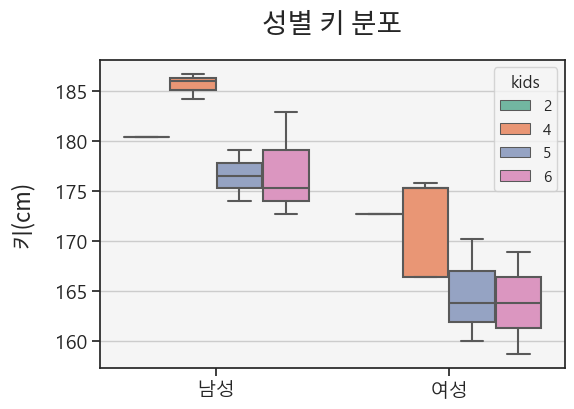

In [250]:
galton = pd.read_csv("./galton.csv", delimiter='\t')
# sns.boxplot(data=galton, x='gender', y='height')
xx = galton[['gender', 'height', 'kids']]
xx['height'] = xx['height'] * 2.54
xx['gender'] = xx['gender'].replace('M', '남성')
xx['gender'] = xx['gender'].replace('F', '여성')
ax = sns.boxplot(data=xx.head(20), x='gender', y='height', hue='kids')
ax.set(xlabel=None)
plt.title("성별 키 분포", font=path_noto, fontsize=titlef)
plt.ylabel("키(cm)", font=path_noto, fontsize=labelf)
# xx.head(10).sort_values(by='height')

In [245]:
galton

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1.0,0.0
894,136A,68.5,65.0,M,67.7,8,1.0,0.0
895,136A,68.5,65.0,F,64.0,8,0.0,1.0
896,136A,68.5,65.0,F,63.5,8,0.0,1.0


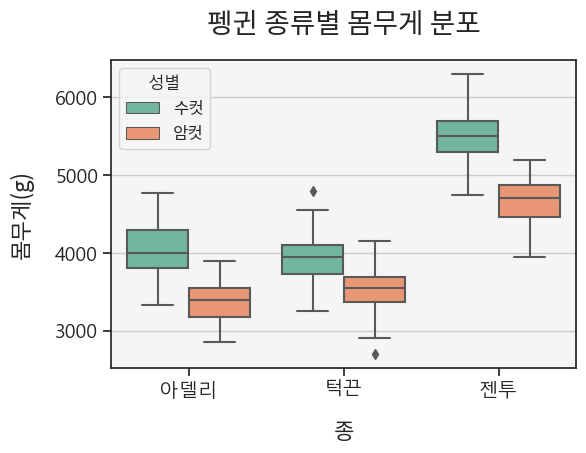

In [276]:
penguin = sns.load_dataset('penguins')
penguin.columns = ['종', '거주 섬', '부리길이', '부리깊이', '날개길이', '몸무게(g)', '성별']
penguin['종'] = penguin['종'].replace('Adelie', '아델리')
penguin['종'] = penguin['종'].replace('Chinstrap', '턱끈')
penguin['종'] = penguin['종'].replace('Gentoo', '젠투')
penguin['성별'] = penguin['성별'].replace('Male', '수컷')
penguin['성별'] = penguin['성별'].replace('Female', '암컷')
sns.boxplot(data=penguin, x='종', y='몸무게(g)', hue='성별')
plt.title('펭귄 종류별 몸무게 분포', font=path_noto, fontsize=titlef)
plt.xlabel('종', font=path_noto, fontsize=labelf)
plt.ylabel('몸무게(g)', font=path_noto, fontsize=labelf)
plt.legend(title='성별', prop=path_noto)

[Text(0.5, 0, '부리길이'), Text(0, 0.5, '')]

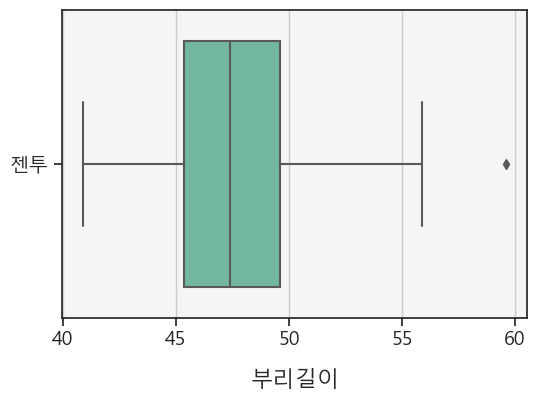

In [296]:
category = penguin['종'].unique()
species1 = penguin[penguin['종'] == category[2]].dropna()

ax = sns.boxplot(data=species1, y='종', x='부리길이', orient='h')
ax.set(xlabel="부리길이", ylabel=None)

In [ ]:
edu = pd.read_csv('./edu.csv')
edu1 = edu[['county', 'per_capita_personal_income_2020', 'associate_degree_numbers_2016_2020', 'bachelor_degree_numbers_2016_2020']]
edu1.columns = ['지역', '소득', '2년제', '4년제']

edu1.corr()

In [ ]:
colleges = pd.read_csv('./colleges.csv')
colleges1 = colleges[{'rank', 'organizationName', 'studentPopulation', 'medianBaseSalary'}]

sns.scatterplot(data=colleges1, x='rank', y='medianBaseSalary', color='limegreen')
plt.title("대학교 순위와 평균연봉($) 간의 관계", font=path_noto, fontsize=titlef)
plt.xlabel("순위", font=path_noto, fontsize=labelf)
plt.ylabel("평균연봉($)", font=path_noto, fontsize=labelf)
plt.show()

In [ ]:
diamonds = sns.load_dataset('diamonds')
sns.scatterplot(data=diamonds, x='carat', y='price', s=10, color='dodgerblue')
plt.title("다이아몬드 캐럿과 가격 간의 관계", font=path_noto, fontsize=titlef)
plt.xlabel("캐럿", font=path_noto, fontsize=labelf)
plt.ylabel("가격", font=path_noto, fontsize=labelf)
plt.show()

In [277]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
planets = sns.load_dataset('planets')
# planets.corr()
sns.scatterplot(data=planets, x='mass', y='orbital_period', color='darkorange')
plt.title("행성의 질량과 공전주기 간의 관계", font=path_noto, fontsize=titlef)
plt.xlabel("질량", font=path_noto, fontsize=labelf)
plt.ylabel("공전주기", font=path_noto, fontsize=labelf)
plt.show()

In [ ]:
sns.get_dataset_names()

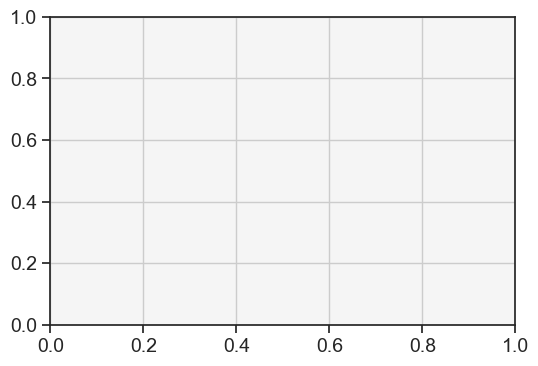

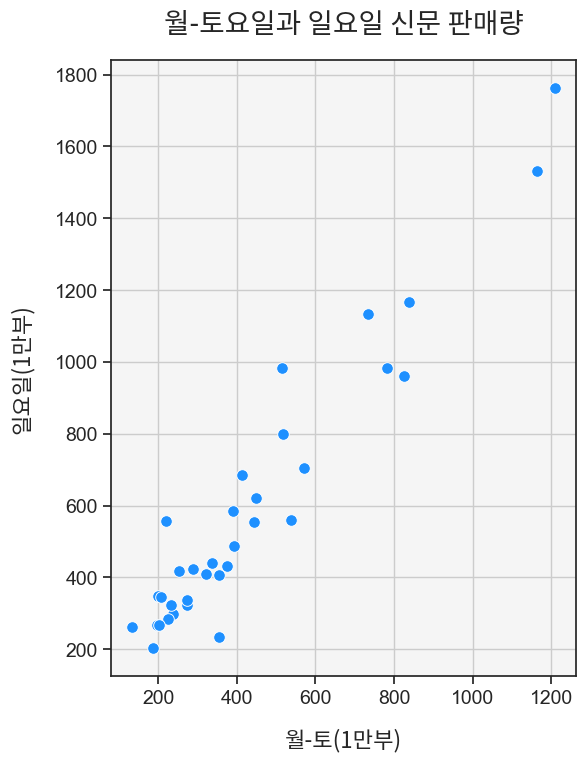

In [5]:
news = pd.read_csv('./NewspaperData.csv')
fig, ax = plt.subplots()
fig = plt.figure(figsize=(6, 8))
ax = sns.scatterplot(data=news, x='daily', y='sunday', s=70, color='dodgerblue')
plt.title("월-토요일과 일요일 신문 판매량", font=path_noto, fontsize=titlef)
plt.xlabel("월-토(1만부)", font=path_noto, fontsize=labelf)
plt.ylabel("일요일(1만부)", font=path_noto, fontsize=labelf)
plt.show(ax)

Text(0, 0.5, '연봉($)')

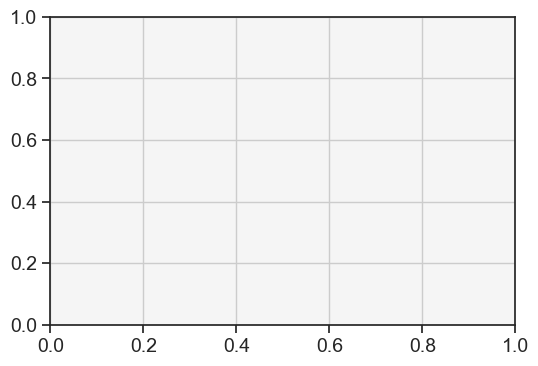

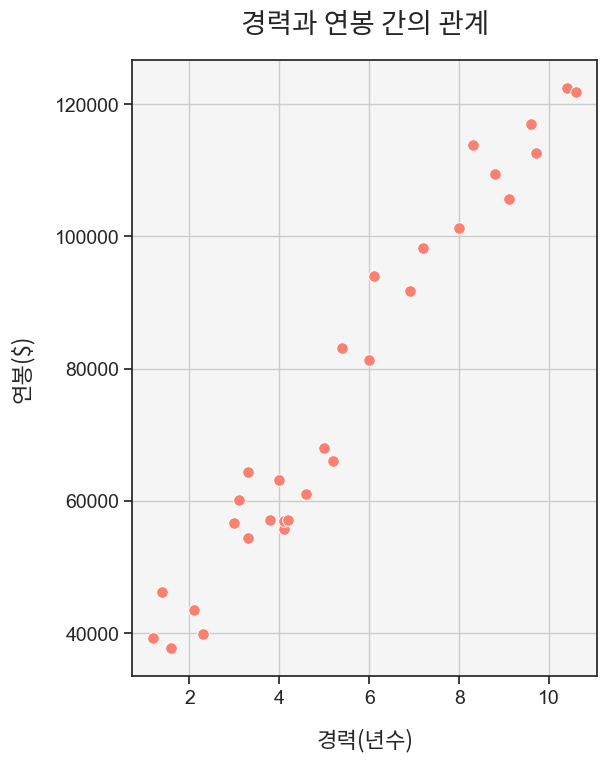

In [6]:
sal = pd.read_csv('./salary.csv')
fig, ax = plt.subplots()
fig = plt.figure(figsize=(6, 8))
sns.scatterplot(data=sal, x='YearsExperience', y='Salary', s=70, color='salmon')
plt.title("경력과 연봉 간의 관계", font=path_noto, fontsize=titlef)
plt.xlabel("경력(년수)", font=path_noto, fontsize=labelf)
plt.ylabel("연봉($)", font=path_noto, fontsize=labelf)